<h3><strong>Installations</strong></h3>

In [ ]:
!apt-get install -y libgeos-dev
!pip install basemap basemap-data

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging


In [ ]:
pip install geopandas pykrige shapely contextily osmnx dash rasterio affine mplcursors

In [ ]:
#Imports
import pandas as pd
import numpy as np
from pykrige.ok import OrdinaryKriging
from pykrige import kriging_tools as kt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.geometry import Point,Polygon
from scipy.interpolate import griddata
import contextily as ctx
import osmnx as ox
import plotly.graph_objects as go
import plotly.express as px
from rasterio.transform import Affine
from rasterio import features

import os

<h3><strong>Loading Datasets</strong></h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Datasets
current_directory = '/content/'
df1 = pd.read_csv(current_directory + 'BanBat_pillai.csv')
df2 = pd.read_csv(current_directory + 'MaryMarryMerry_pillai.csv')
df3 = pd.read_csv(current_directory + 'PinPen_pillai.csv')
df4 = pd.read_csv(current_directory + 'ThoughtLot_pillai.csv')
df5 = pd.read_csv(current_directory + 'PricePride_pillai.csv')
df6 = pd.read_csv(current_directory + 'ColtCult_pillai.csv')
df7 = pd.read_csv(current_directory + 'PricePride_hz.csv')
df8 = pd.read_csv(current_directory + 'sfvs.csv')
df9 = pd.read_csv(current_directory + 'StartPalm_scores.csv')
df10 = pd.read_csv(current_directory + 'Rhoticity_scores.csv')
geo_df = pd.read_csv(current_directory + 'EMDemographics_Geocoded.csv')

In [ ]:
df1.head()

Unnamed: 0   speaker   Latitude  Longitude       HomeTown  BanBat_pillai
0           1  EM-02-35  42.465305 -71.018494            NaN       0.745897
1           2  EM-02-27  42.067522 -71.044299       brockton       0.880543
2           3  EM-03-06  41.654866 -70.321169     barnstable       0.564361
3           4  EM-02-79  42.262689 -71.117827         boston       0.697946
4           5  EM-02-80  42.285849 -71.075737  jamaica_plain       0.614670

<h3><strong>EDA</strong></h3>

In [ ]:
print("Size of df1:", df1.shape)
print("Size of df2:", df2.shape)
print("Size of df3:", df3.shape)
print("Size of df4:", df4.shape)
print("Size of df5:", df5.shape)
print("Size of df6:", df6.shape)
print("Size of df7:", df7.shape)
print("Size of df8:", df8.shape)
print("Size of df9:", df9.shape)
print("Size of df10:", df10.shape)

Size of df1: (87, 6)
Size of df2: (87, 5)
Size of df3: (87, 6)
Size of df4: (87, 6)
Size of df5: (87, 6)
Size of df6: (87, 5)
Size of df7: (87, 4)
Size of df8: (87, 4)
Size of df9: (87, 6)
Size of df10: (70, 4)


In [ ]:
df10.head()

speaker   _r   _x  percentage_x
0  EM-01-03  294  208     41.434263
1  EM-01-05  421   74     14.949495
2  EM-02-02  499  125     20.032051
3  EM-02-03  461  134     22.521008
4  EM-02-04  477  193     28.805970

In [ ]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8]
for i, df in enumerate(dfs):
  print(f"DataFrame {i+1}:")
  if 'Latitude' in df.columns and 'Longitude' in df.columns:
    print(f"Latitude Range: {df['Latitude'].min()} to {df['Latitude'].max()}")
    print(f"Longitude Range: {df['Longitude'].min()} to {df['Longitude'].max()}")
  else:
    print("Latitude or Longitude columns not found in this DataFrame.")
  print("-" * 20)


DataFrame 1:
Latitude Range: 41.6453018 to 42.749817
Longitude Range: -71.6130076 to -70.3211692
--------------------
DataFrame 2:
Latitude Range: 41.6453018 to 42.749817
Longitude Range: -71.6130076 to -70.3211692
--------------------
DataFrame 3:
Latitude Range: 41.6453018 to 42.749817
Longitude Range: -71.6130076 to -70.3211692
--------------------
DataFrame 4:
Latitude Range: 41.6453018 to 42.749817
Longitude Range: -71.6130076 to -70.3211692
--------------------
DataFrame 5:
Latitude Range: 41.6453018 to 42.749817
Longitude Range: -71.6130076 to -70.3211692
--------------------
DataFrame 6:
Latitude Range: 41.6453018 to 42.749817
Longitude Range: -71.6130076 to -70.3211692
--------------------
DataFrame 7:
Latitude Range: 41.6453018 to 42.749817
Longitude Range: -71.6130076 to -70.3211692
--------------------
DataFrame 8:
Latitude Range: 41.6453018 to 42.749817
Longitude Range: -71.6130076 to -70.3211692
--------------------


<h3><strong>Pre-Processing</strong></h3>

In [ ]:
# Merge datasets sequentially
combined_df = df1.merge(df2, on="speaker", suffixes=('', '_y')) \
                 .merge(df3, on="speaker", suffixes=('', '_z')) \
                 .merge(df4, on="speaker", suffixes=('', '_w')) \
                 .merge(df5, on="speaker", suffixes=('', '_v')) \
                 .merge(df6, on="speaker", suffixes=('', '_u')) \
                 .merge(df7, on="speaker", suffixes=('', '_t')) \
                 .merge(df8, on="speaker", suffixes=('', '_s')) \
                 .merge(df9, on="speaker", suffixes=('', '_r'))

# Remove duplicate coordinate columns (if any)
combined_df = combined_df.loc[:, ~combined_df.columns.str.endswith(('_y', '_z', '_w', '_v', '_u', '_t', '_s', '_r'))]

In [ ]:
# Explicit coordinate selection
combined_df = combined_df[["speaker", "Latitude", "Longitude",
                          "BanBat_pillai", "MaryMarryMerry_pillai",
                          "PinPen_pillai", "ThoughtLot_pillai","PricePride_pillai", "ColtCult_pillai", "START_minus_LOT", "PALM_minus_LOT", "F1_diff", "sfvs"]]

combined_df.head()

speaker   Latitude  Longitude  BanBat_pillai  MaryMarryMerry_pillai  \
0  EM-02-35  42.465305 -71.018494       0.745897               0.280271   
1  EM-02-27  42.067522 -71.044299       0.880543               0.334992   
2  EM-03-06  41.654866 -70.321169       0.564361               0.277015   
3  EM-02-79  42.262689 -71.117827       0.697946               0.693426   
4  EM-02-80  42.285849 -71.075737       0.614670               0.514194   

   PinPen_pillai  ThoughtLot_pillai  PricePride_pillai  ColtCult_pillai  \
0       0.137653           0.111587           0.128368              NaN   
1       0.400452           0.164696           0.093452         0.605072   
2       0.355370           0.089514           0.057109              NaN   
3       0.492635           0.107298           0.098337         0.045576   
4       0.016016           0.089485           0.109289         0.393764   

   START_minus_LOT  PALM_minus_LOT     F1_diff      sfvs  
0        64.587500      -57.544444 -168.709509  2.159453  
1       -11.910823     -389.838095 -170.794055  2.155722  
2        31.773798      -22.197313  -93.986735  2.232199  
3        60.264259        1.451024 -118.128356  2.217285  
4       -12.034644     -100.542100 -164.309740  1.910417

In [ ]:
print("Length of combined_df (Speakers Count):", len(combined_df))

Length of combined_df (Speakers Count): 87


In [ ]:
null_count = combined_df['ColtCult_pillai'].isnull().sum()
print(f"Number of nulls in 'ColtCult_pillai': {null_count}")

Number of nulls in 'ColtCult_pillai': 13


In [ ]:
null_count = combined_df['sfvs'].isnull().sum()
print(f"Number of nulls in 'sfvs': {null_count}")

Number of nulls in 'sfvs': 0


In [ ]:
# Check for non-float values in 'Longitude' column
non_float_values = combined_df[~combined_df['Longitude'].astype(str).str.replace('.', '', 1).str.isdigit()]['Longitude'].unique()
non_float_values


array([-71.0184938, -71.0442995, -70.3211692, -71.1178267, -71.0757371,
       -71.3118269, -71.0449946, -71.0448531, -71.0620287, -71.1071909,
       -71.0811608, -71.3263253, -71.087859 , -70.8772451, -71.1867993,
       -71.1850523, -71.1320302, -70.9063805, -71.2791497, -70.8971046,
       -71.0094653, -71.111566 , -70.9748155, -71.4030911, -71.1429157,
       -71.0845953, -70.9470754, -71.0818113, -71.1253373, -71.0810667,
       -71.4580815, -70.951191 , -71.3352222, -71.4378492, -71.2739514,
       -71.1913348, -71.0991275, -71.1033003, -71.1178911, -71.6130076,
       -71.3614789, -70.8692233, -71.0845504, -71.5464306, -71.1314426,
       -71.0454645, -70.8811725, -70.9410356, -71.068731 , -71.1559917,
       -71.1125269, -71.1009029, -71.1747435, -71.1450153, -71.072105 ,
       -71.093483 , -71.049124 , -71.1455508])

In [ ]:
# Issue fix
combined_df['Longitude'] = combined_df['Longitude'].replace({'?71.049124': -71.049124})

In [ ]:
# Issue fix
# Convert the 'Longitude' column to numeric, coercing errors to NaN
combined_df['Longitude'] = pd.to_numeric(combined_df['Longitude'], errors='coerce')

In [ ]:
# Save the combined_df as a CSV file
combined_df.to_csv('combined_data.csv', index=False)

In [ ]:
combined_df.head()

speaker   Latitude  Longitude  BanBat_pillai  MaryMarryMerry_pillai  \
0  EM-02-35  42.465305 -71.018494       0.745897               0.280271   
1  EM-02-27  42.067522 -71.044299       0.880543               0.334992   
2  EM-03-06  41.654866 -70.321169       0.564361               0.277015   
3  EM-02-79  42.262689 -71.117827       0.697946               0.693426   
4  EM-02-80  42.285849 -71.075737       0.614670               0.514194   

   PinPen_pillai  ThoughtLot_pillai  PricePride_pillai  ColtCult_pillai  \
0       0.137653           0.111587           0.128368              NaN   
1       0.400452           0.164696           0.093452         0.605072   
2       0.355370           0.089514           0.057109              NaN   
3       0.492635           0.107298           0.098337         0.045576   
4       0.016016           0.089485           0.109289         0.393764   

   START_minus_LOT  PALM_minus_LOT     F1_diff      sfvs  
0        64.587500      -57.544444 -168.709509  2.159453  
1       -11.910823     -389.838095 -170.794055  2.155722  
2        31.773798      -22.197313  -93.986735  2.232199  
3        60.264259        1.451024 -118.128356  2.217285  
4       -12.034644     -100.542100 -164.309740  1.910417

<h3><strong>Ordinary Kriging</strong></h3>

In [ ]:
x = combined_df['Longitude'].values
y = combined_df['Latitude'].values

In [ ]:
# Define the grid for kriging
gridx = np.linspace(min(x), max(x), 500)  # 500 points along longitude
gridy = np.linspace(min(y), max(y), 500)  # 500 points along latitude

In [ ]:
def ordKriging(x, y, z, gridx, gridy):
    """Modified kriging with null handling and validation"""
    # Create mask for non-null values
    valid_mask = ~np.isnan(z)

    # Filter coordinates and values
    x_clean = x[valid_mask]
    y_clean = y[valid_mask]
    z_clean = z[valid_mask]

    # Handle case with insufficient data points
    if len(z_clean) < 2:
        return np.full(gridx.shape, 0.5)  # Return neutral value if <2 points

    # Perform ordinary kriging with cleaned data
    OK = OrdinaryKriging(
        x_clean, y_clean, z_clean,
        variogram_model='linear',
        variogram_parameters={'slope': 1.0, 'nugget': 0.001},
        verbose=False,
        enable_plotting=False
    )

    z_grid, ss = OK.execute('grid', gridx, gridy)

    # Post-processing
    z_grid = np.clip(z_grid, 0, 1)
    z_grid = np.nan_to_num(z_grid, nan=0.5)  # Fill remaining NaNs

    return z_grid


In [ ]:
def ordKriging2(x, y, z, gridx, gridy):
    """Modified kriging with null handling and validation"""
    # Create mask for non-null values
    valid_mask = ~np.isnan(z)

    # Filter coordinates and values
    x_clean = x[valid_mask]
    y_clean = y[valid_mask]
    z_clean = z[valid_mask]

    # Handle case with insufficient data points
    if len(z_clean) < 2:
        return np.full(gridx.shape, 0.5)  # Return neutral value if <2 points

    # Perform ordinary kriging with cleaned data
    OK = OrdinaryKriging(
        x_clean, y_clean, z_clean,
        variogram_model='linear',
        variogram_parameters={'slope': 1.0, 'nugget': 0.001},
        verbose=False,
        enable_plotting=False
    )

    z_grid, ss = OK.execute('grid', gridx, gridy)

    # Post-processing
    z_grid = np.nan_to_num(z_grid, nan=0.5)  # Fill remaining NaNs

    return z_grid


<h3><strong>Heatmaps</strong></h3>

In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from shapely.geometry import Point
import contextily as ctx  # For basemap

def plotHeatmaps(x, y, z, gridx, gridy, title):
    # Perform Kriging interpolation
    z_grid = ordKriging(x, y, z, gridx, gridy)

    # Load the shapefile
    land_mask = gpd.read_file("/content/Clipped_land_ExportFeatures.shp")

    # Create a custom colormap with a neutral white at 0.5
    colors_list = ["red", "white", "blue"]
    cmap = colors.LinearSegmentedColormap.from_list("custom", colors_list)

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Define contour levels to match the normalized [0, 1] range
    levels = np.linspace(0, 1, 101)  # 101 levels from 0 to 1 for smooth gradients

    # Mask the heatmap data to the land area
    xx, yy = np.meshgrid(gridx, gridy)
    points = np.vstack((xx.flatten(), yy.flatten())).T

    # Create a mask for points inside the land area
    land_polygon = land_mask.geometry.unary_union
    mask = np.array([land_polygon.contains(Point(point)) for point in points])
    z_grid_masked = np.where(mask.reshape(z_grid.shape), z_grid, np.nan)

    # Plot the masked heatmap with reduced alpha (e.g., 0.7 for semi-transparency)
    contour = ax.contourf(gridx, gridy, z_grid_masked, levels=levels, cmap=cmap, alpha=0.7)  # Reduced opacity

    # Add colorbar with custom scale (0, 0.2, 0.4, 0.6, 0.8, 1)
    cbar = plt.colorbar(contour, ax=ax, label='Pillai Score', shrink=0.4)
    cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])  # Set specific tick marks
    cbar.set_ticklabels(['0 (Closer)', '0.2', '0.4', '0.6', '0.8', '1 (Farther)'])  # Custom labels

    # Plot the land area with a thinner outline
    land_mask.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)  # Thinner borders

    # Add a basemap with white/light water bodies and city names (using CartoDB.Voyager)
    try:
        ctx.add_basemap(
            ax,
            crs="EPSG:4326",  # Assuming your data is in WGS84
            source=ctx.providers.CartoDB.Voyager,  # Clean style with labels and light water
            alpha=0.8  # Slightly transparent basemap
        )
    except Exception as e:
        print(f"Could not add basemap: {e}")
        ax.set_facecolor("white")  # Fallback to white background if basemap fails

    # Set plot title and labels
    ax.set_title('Phonological Variation in Boston and Surrounding Areas : ' + title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Zoom into the dataset extent
    ax.set_xlim(min(gridx), max(gridx))
    ax.set_ylim(min(gridy), max(gridy))

    plt.show()

In [ ]:
def plotHeatmaps2(x, y, z, gridx, gridy, title, label):
    # Perform Kriging interpolation
    z_grid = ordKriging2(x, y, z, gridx, gridy)

    # Load the shapefile
    land_mask = gpd.read_file("/content/Clipped_land_ExportFeatures.shp")

    # Determine the min and max values of z
    z_min, z_max = np.min(z), np.max(z)

    # Create a custom colormap
    colors_list = ["red", "white", "blue"]
    cmap = colors.LinearSegmentedColormap.from_list("custom", colors_list)

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Define contour levels based on the min-max range of z
    levels = np.linspace(z_min, z_max, 101)  # 101 levels for smooth gradients

    # Mask the heatmap data to the land area
    xx, yy = np.meshgrid(gridx, gridy)
    points = np.vstack((xx.flatten(), yy.flatten())).T

    # Create a mask for points inside the land area
    land_polygon = land_mask.geometry.unary_union
    mask = np.array([land_polygon.contains(Point(point)) for point in points])
    z_grid_masked = np.where(mask.reshape(z_grid.shape), z_grid, np.nan)

    # Plot the masked heatmap with reduced alpha
    contour = ax.contourf(gridx, gridy, z_grid_masked, levels=levels, cmap=cmap, alpha=0.7)

    # Add colorbar with dynamically adjusted scale
    cbar = plt.colorbar(contour, ax=ax, label=label, shrink=0.4)
    cbar.set_ticks(np.linspace(z_min, z_max, 6))  # Set 6 tick marks within the min-max range
    cbar.set_ticklabels([f'{val:.2f}' for val in np.linspace(z_min, z_max, 6)])  # Format tick labels

    # Plot the land area with a thinner outline
    land_mask.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

    # Add a basemap
    try:
        ctx.add_basemap(
            ax,
            crs="EPSG:4326",
            source=ctx.providers.CartoDB.Voyager,
            alpha=0.8
        )
    except Exception as e:
        print(f"Could not add basemap: {e}")
        ax.set_facecolor("white")

    # Set plot title and labels
    ax.set_title('Phonological Variation in Boston and Surrounding Areas : ' + title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Zoom into the dataset extent
    ax.set_xlim(min(gridx), max(gridx))
    ax.set_ylim(min(gridy), max(gridy))

    plt.show()

<h4><strong> - Pillai Score maps</strong></h4>

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



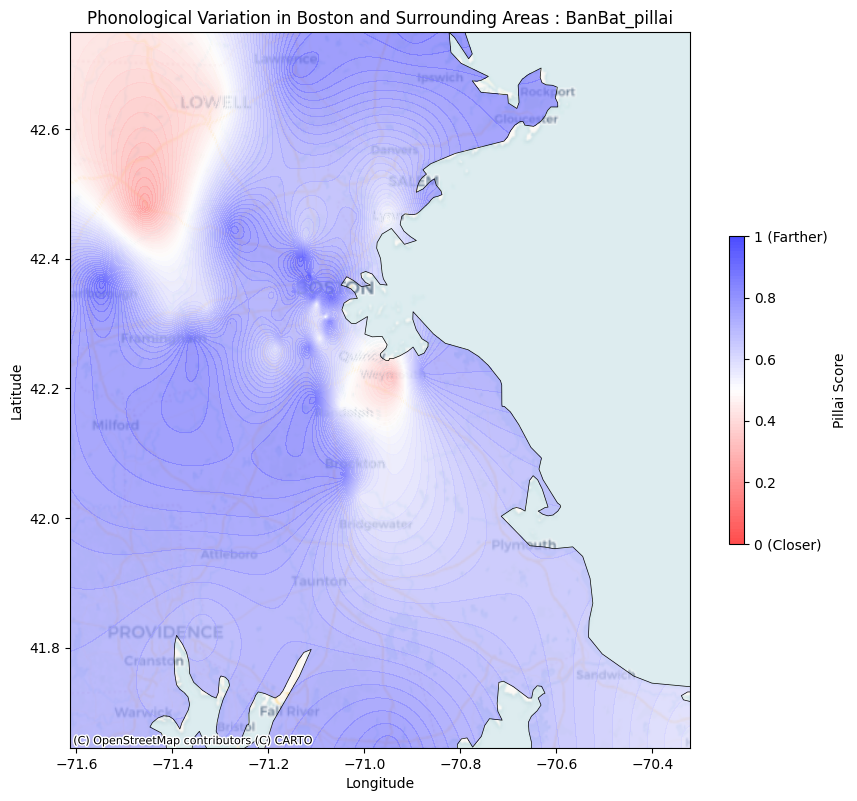

In [ ]:
plotHeatmaps(x, y, combined_df['BanBat_pillai'].values,gridx,gridy,'BanBat_pillai')

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



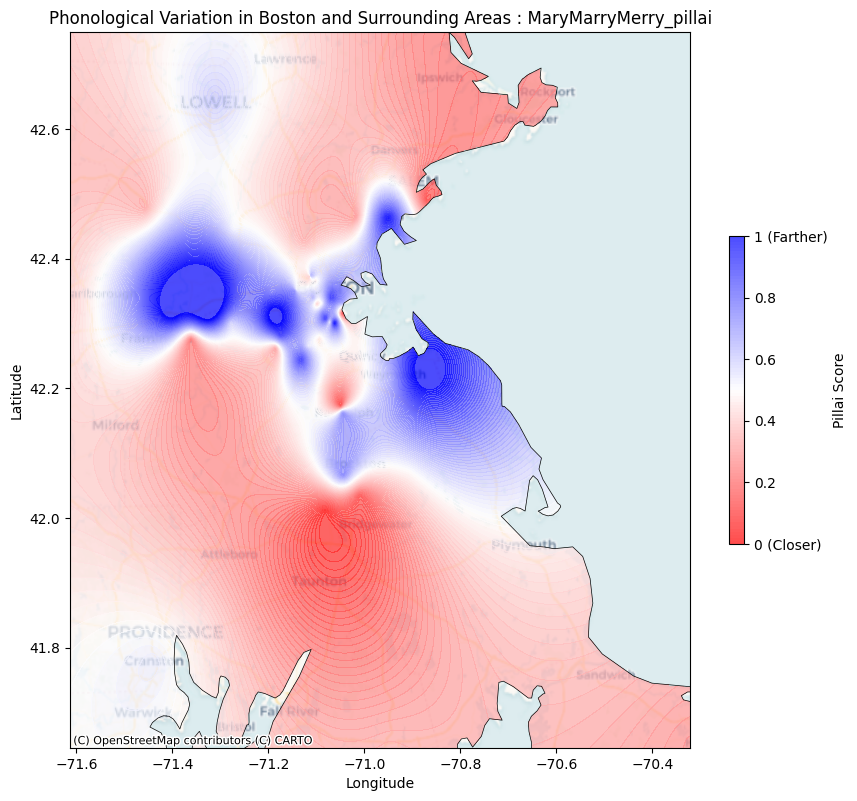

In [ ]:
plotHeatmaps(x, y, combined_df['MaryMarryMerry_pillai'].values,gridx,gridy,'MaryMarryMerry_pillai')

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



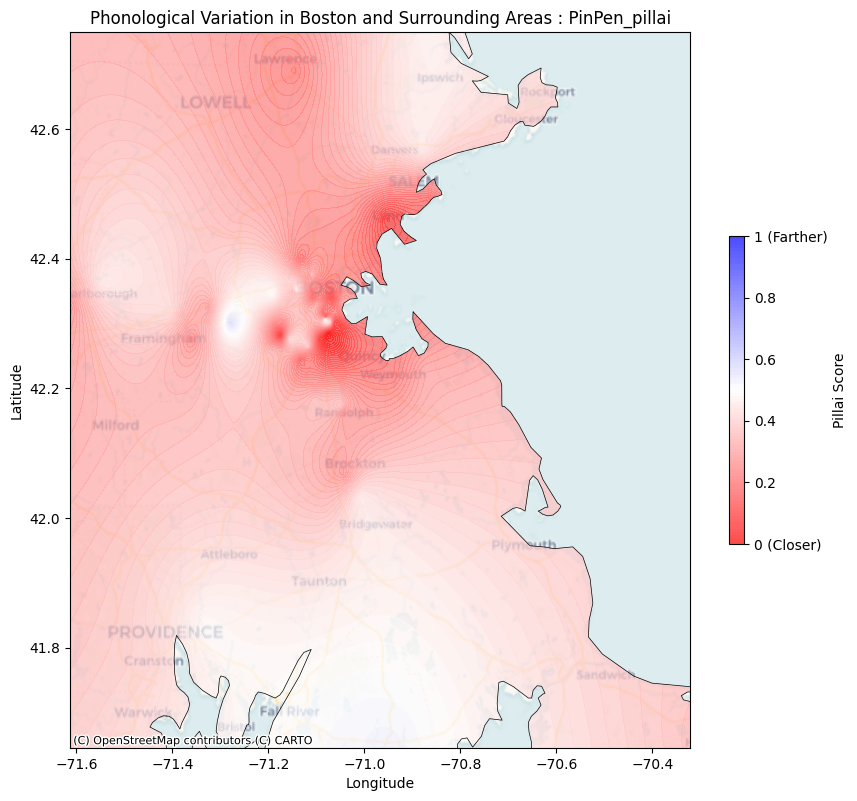

In [ ]:
plotHeatmaps(x, y, combined_df['PinPen_pillai'].values,gridx,gridy,'PinPen_pillai')

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



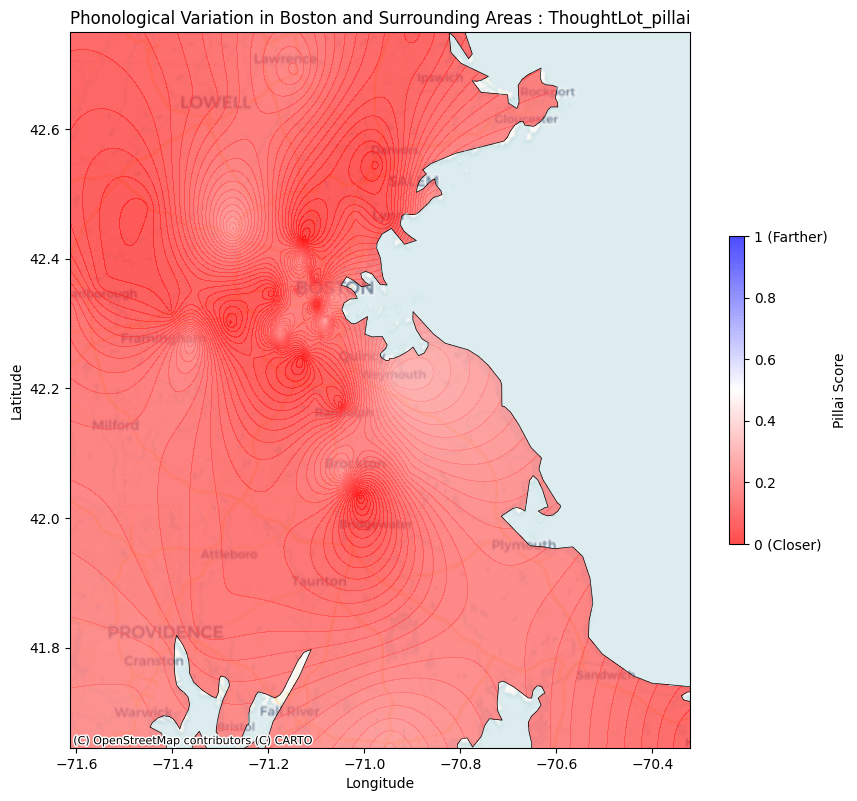

In [ ]:
plotHeatmaps(x, y, combined_df['ThoughtLot_pillai'].values,gridx,gridy,'ThoughtLot_pillai')

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



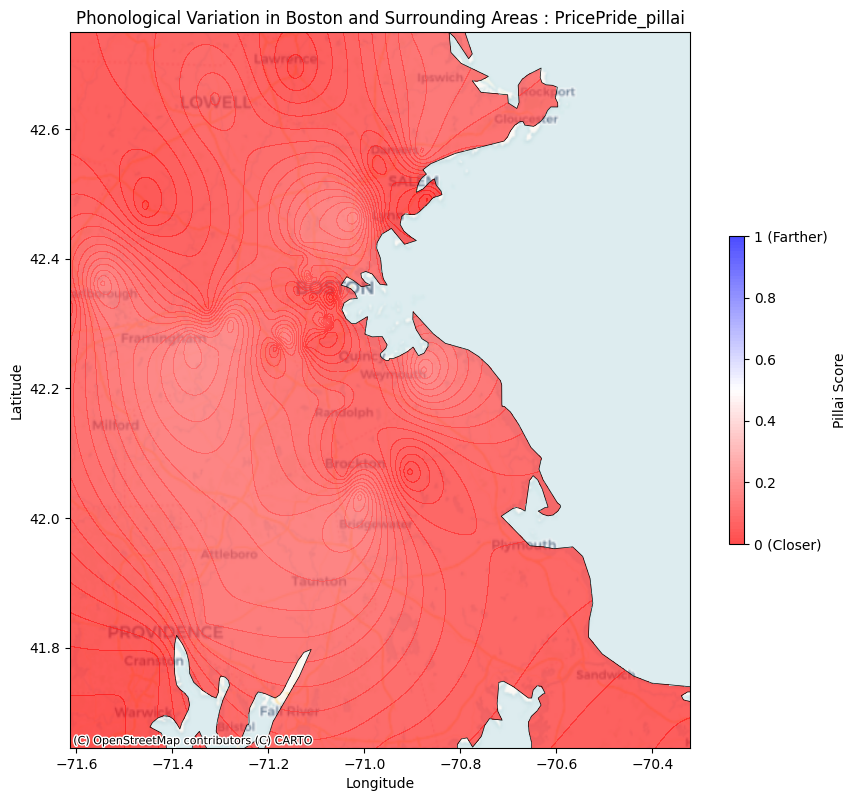

In [ ]:
plotHeatmaps(x, y, combined_df['PricePride_pillai'].values,gridx,gridy,'PricePride_pillai')

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



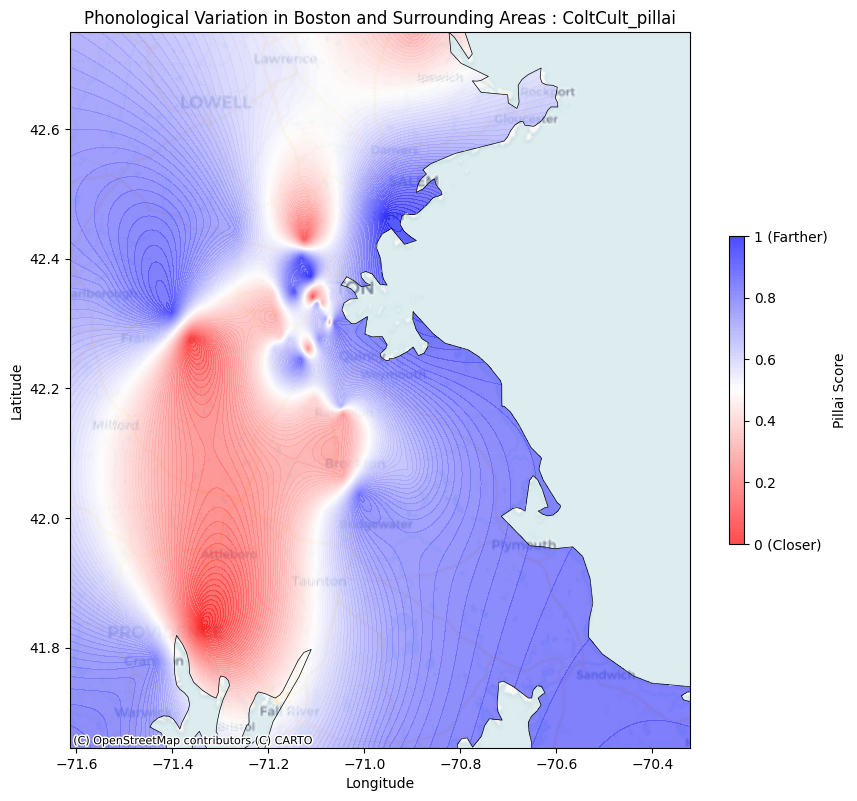

In [ ]:
plotHeatmaps(x, y, combined_df['ColtCult_pillai'].values,gridx,gridy,'ColtCult_pillai')

<h4><strong> - SFVS Plots</strong></h4>

<ipython-input-83-3256ae52e2bc>:26: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



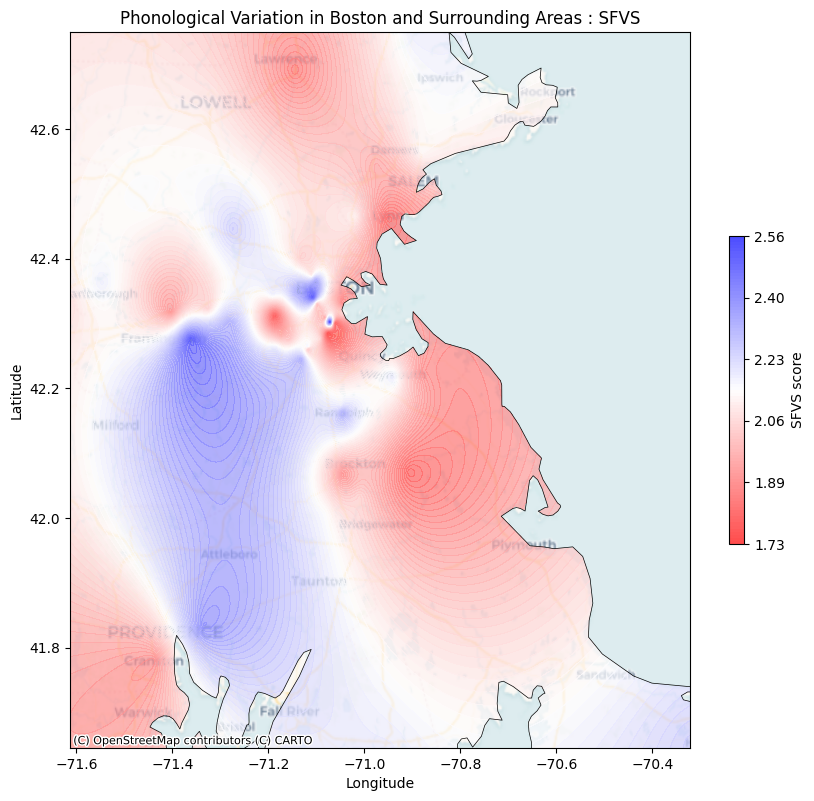

In [ ]:
plotHeatmaps2(x, y, combined_df['sfvs'].values,gridx,gridy,'SFVS','SFVS score')

<h4><strong> - Hz Plots</strong></h4>

<ipython-input-83-3256ae52e2bc>:26: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



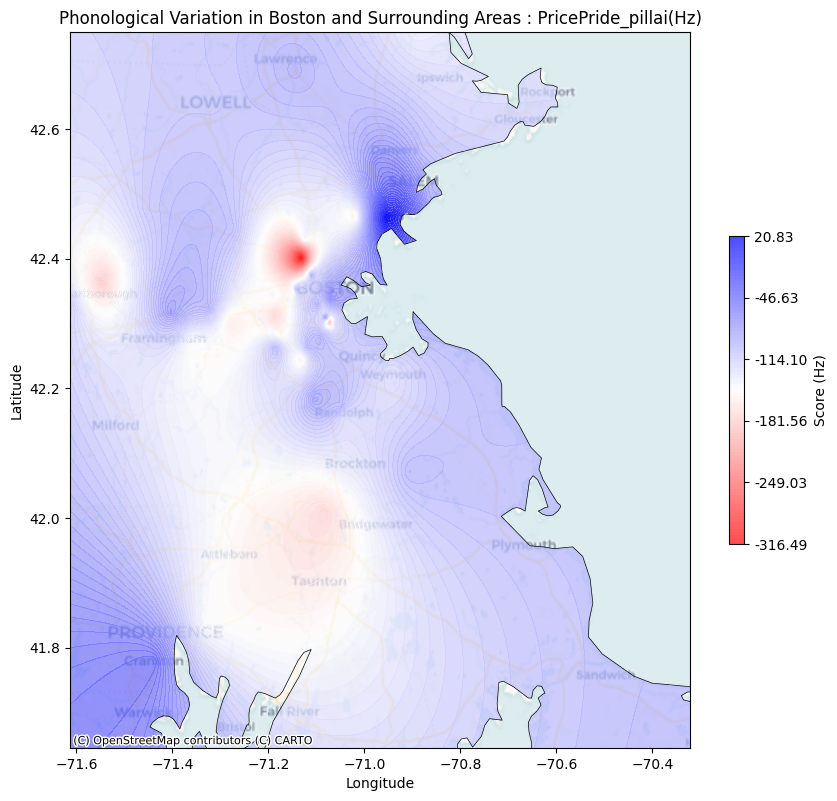

In [ ]:
plotHeatmaps2(x, y, combined_df['F1_diff'].values,gridx,gridy,'PricePride_pillai(Hz)','Score (Hz)')

<h4><strong> - Fronting Maps</strong></h4>

<ipython-input-83-3256ae52e2bc>:26: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



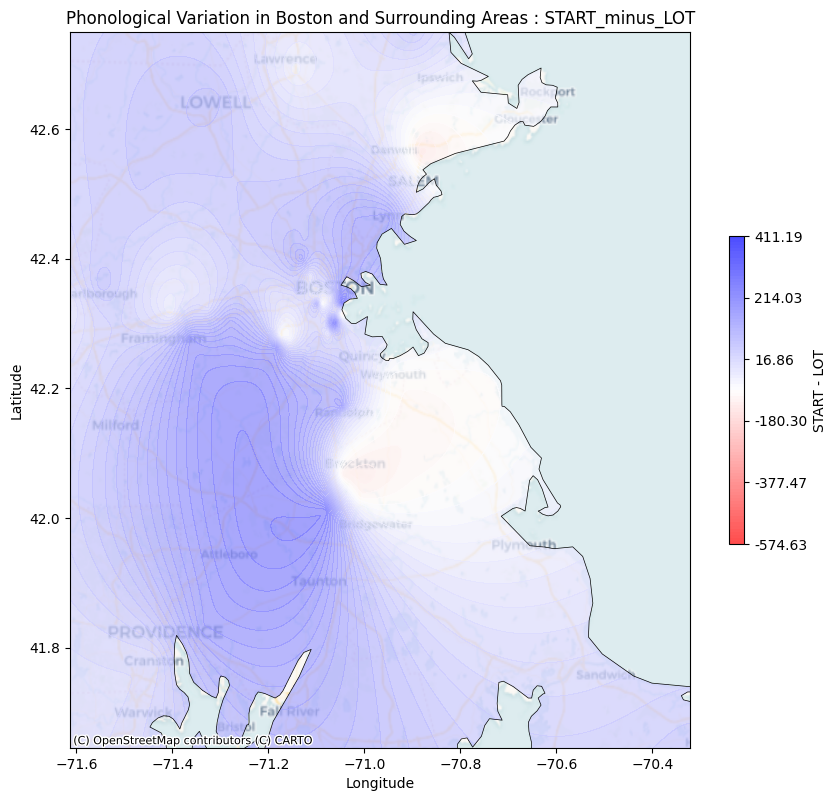

In [ ]:
plotHeatmaps2(x, y, combined_df['START_minus_LOT'].values,gridx,gridy,'START_minus_LOT','START - LOT')

<ipython-input-83-3256ae52e2bc>:26: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



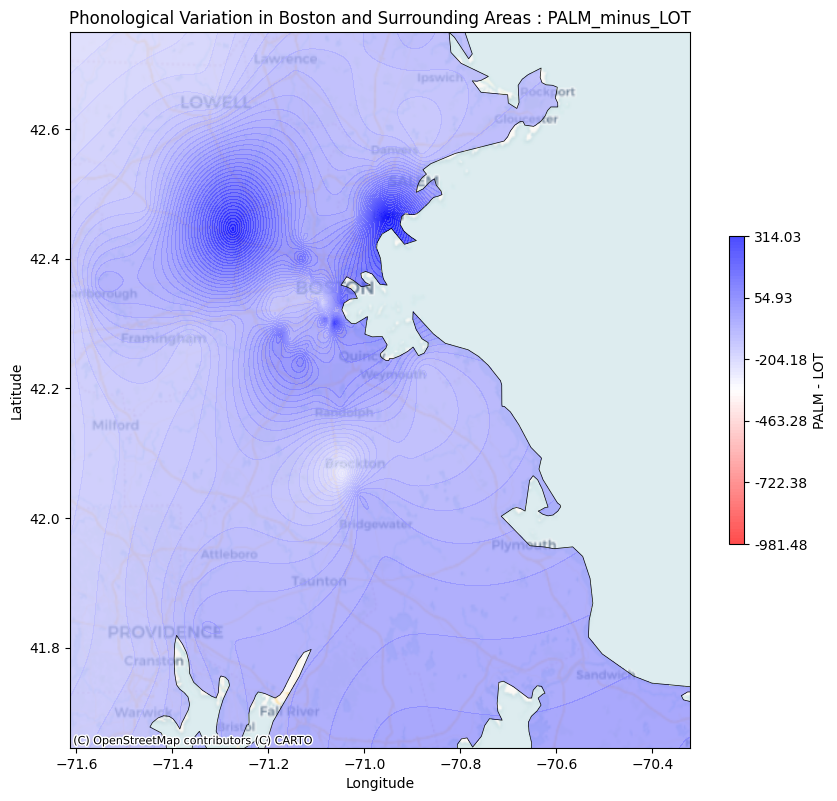

In [ ]:
plotHeatmaps2(x, y, combined_df['PALM_minus_LOT'].values,gridx,gridy,'PALM_minus_LOT','PALM - LOT')

<ipython-input-27-efdc4172ae31>:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  land_polygon = land_mask.geometry.unary_union


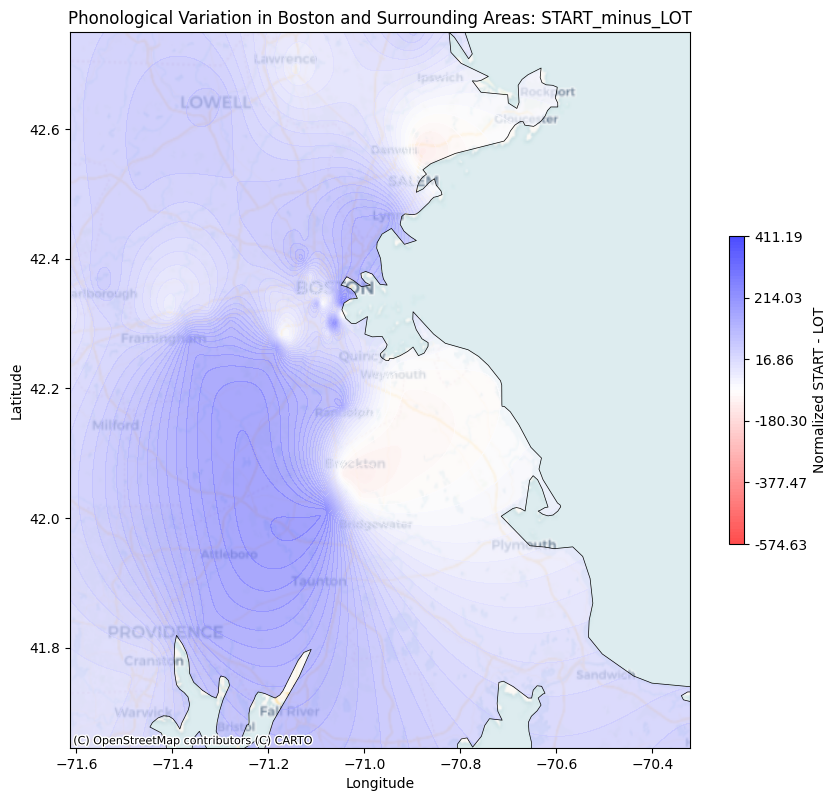

<ipython-input-27-efdc4172ae31>:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  land_polygon = land_mask.geometry.unary_union


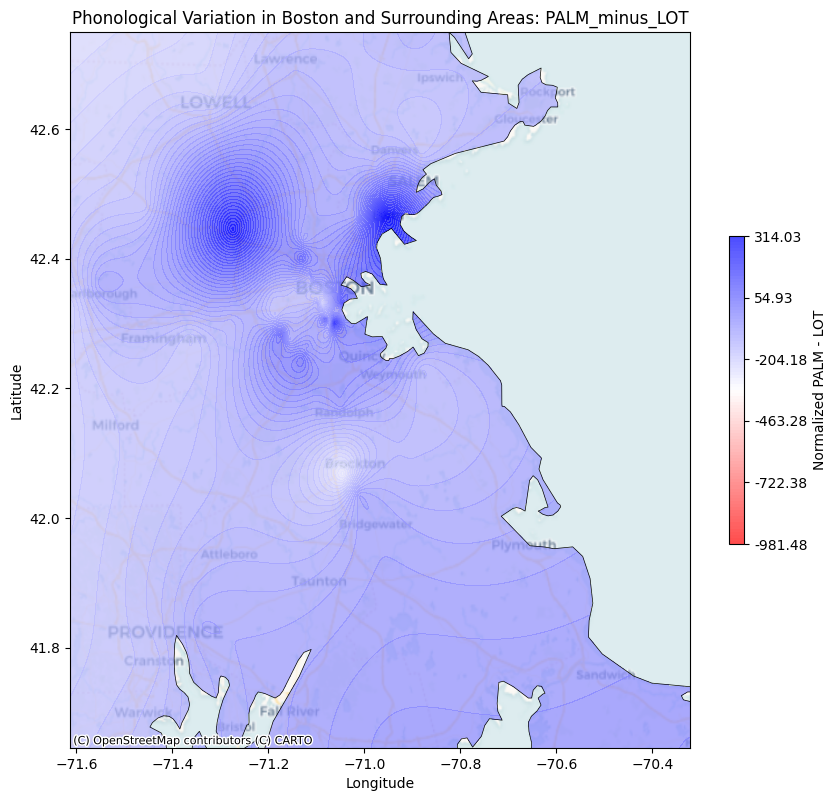

In [ ]:
def plotHeatmapsNormalized(x, y, z, gridx, gridy, title, label):
    # Normalize the z values to range between 0 and 1
    z_min, z_max = np.nanmin(z), np.nanmax(z)
    z_normalized = (z - z_min) / (z_max - z_min)

    # Perform Kriging interpolation on normalized data
    z_grid = ordKriging2(x, y, z_normalized, gridx, gridy)

    # Load the shapefile
    land_mask = gpd.read_file("/content/Clipped_land_ExportFeatures.shp")

    # Create a custom colormap
    colors_list = ["red", "white", "blue"]
    cmap = colors.LinearSegmentedColormap.from_list("custom", colors_list)

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Define contour levels from 0 to 1
    levels = np.linspace(0, 1, 101)

    # Mask heatmap data to land area
    xx, yy = np.meshgrid(gridx, gridy)
    points = np.vstack((xx.flatten(), yy.flatten())).T
    land_polygon = land_mask.geometry.unary_union
    mask = np.array([land_polygon.contains(Point(point)) for point in points])
    z_grid_masked = np.where(mask.reshape(z_grid.shape), z_grid, np.nan)

    # Plot masked heatmap
    contour = ax.contourf(gridx, gridy, z_grid_masked, levels=levels, cmap=cmap, alpha=0.7)

    # Add normalized colorbar
    cbar = plt.colorbar(contour, ax=ax, label=f'Normalized {label}', shrink=0.4)
    cbar.set_ticks(np.linspace(0, 1, 6))
    cbar.set_ticklabels([f'{val:.2f}' for val in np.linspace(z_min, z_max, 6)])

    # Plot land mask
    land_mask.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

    # Add basemap
    try:
        ctx.add_basemap(
            ax,
            crs="EPSG:4326",
            source=ctx.providers.CartoDB.Voyager,
            alpha=0.8
        )
    except Exception as e:
        print(f"Could not add basemap: {e}")
        ax.set_facecolor("white")

    # Set plot title and labels
    ax.set_title('Phonological Variation in Boston and Surrounding Areas: ' + title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Zoom into dataset extent
    ax.set_xlim(min(gridx), max(gridx))
    ax.set_ylim(min(gridy), max(gridy))

    plt.show()

# Example Usage:
plotHeatmapsNormalized(x, y, combined_df['START_minus_LOT'].values, gridx, gridy, 'START_minus_LOT', 'START - LOT')
plotHeatmapsNormalized(x, y, combined_df['PALM_minus_LOT'].values, gridx, gridy, 'PALM_minus_LOT', 'PALM - LOT')


<ipython-input-28-ed4220e6e9d4>:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  land_polygon = land_mask.geometry.unary_union


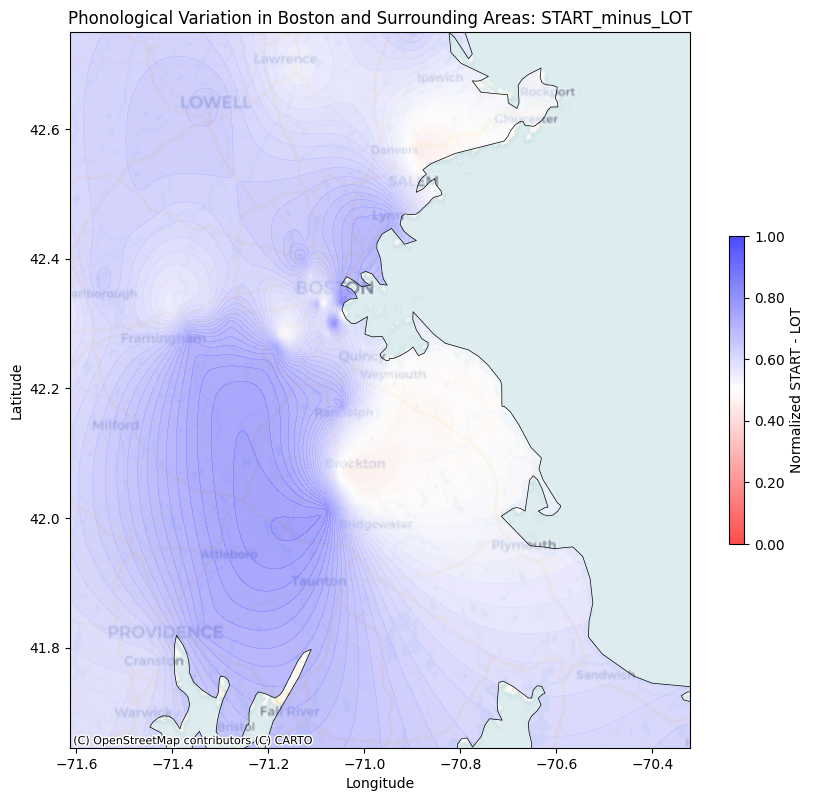

<ipython-input-28-ed4220e6e9d4>:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  land_polygon = land_mask.geometry.unary_union


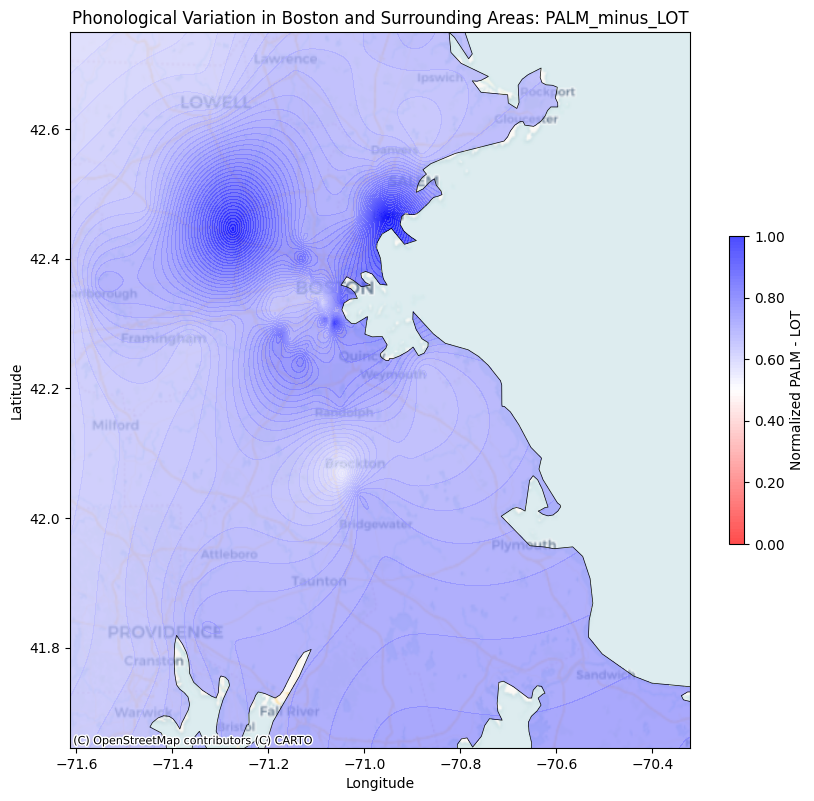

In [ ]:
def plotHeatmapsNormalized(x, y, z, gridx, gridy, title, label):
    # Normalize the z values to range between 0 and 1
    z_min, z_max = np.nanmin(z), np.nanmax(z)
    z_normalized = (z - z_min) / (z_max - z_min)

    # Perform Kriging interpolation on normalized data
    z_grid = ordKriging2(x, y, z_normalized, gridx, gridy)

    # Load the shapefile
    land_mask = gpd.read_file("/content/Clipped_land_ExportFeatures.shp")

    # Create a custom colormap
    colors_list = ["red", "white", "blue"]
    cmap = colors.LinearSegmentedColormap.from_list("custom", colors_list)

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Define contour levels from 0 to 1
    levels = np.linspace(0, 1, 101)

    # Mask heatmap data to land area
    xx, yy = np.meshgrid(gridx, gridy)
    points = np.vstack((xx.flatten(), yy.flatten())).T
    land_polygon = land_mask.geometry.unary_union
    mask = np.array([land_polygon.contains(Point(point)) for point in points])
    z_grid_masked = np.where(mask.reshape(z_grid.shape), z_grid, np.nan)

    # Plot masked heatmap
    contour = ax.contourf(gridx, gridy, z_grid_masked, levels=levels, cmap=cmap, alpha=0.7)

    # Add normalized colorbar
    cbar = plt.colorbar(contour, ax=ax, label=f'Normalized {label}', shrink=0.4)
    cbar.set_ticks(np.linspace(0, 1, 6))
    cbar.set_ticklabels(['0.00', '0.20', '0.40', '0.60', '0.80', '1.00'])

    # Plot land mask
    land_mask.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

    # Add basemap
    try:
        ctx.add_basemap(
            ax,
            crs="EPSG:4326",
            source=ctx.providers.CartoDB.Voyager,
            alpha=0.8
        )
    except Exception as e:
        print(f"Could not add basemap: {e}")
        ax.set_facecolor("white")

    # Set plot title and labels
    ax.set_title('Phonological Variation in Boston and Surrounding Areas: ' + title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Zoom into dataset extent
    ax.set_xlim(min(gridx), max(gridx))
    ax.set_ylim(min(gridy), max(gridy))

    plt.show()

# Example Usage:
plotHeatmapsNormalized(x, y, combined_df['START_minus_LOT'].values, gridx, gridy, 'START_minus_LOT', 'START - LOT')
plotHeatmapsNormalized(x, y, combined_df['PALM_minus_LOT'].values, gridx, gridy, 'PALM_minus_LOT', 'PALM - LOT')


<h4><strong> - Rhoticity</strong></h4>

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
from shapely.geometry import Point
import contextily as ctx
from pykrige.ok import OrdinaryKriging

# Load merged speaker rhoticity data
combined_df = pd.read_csv('Speaker_Rhoticity_Summary.csv')
location_df = pd.read_csv('BanBat_pillai.csv')[['speaker', 'Latitude', 'Longitude']]
combined_df = combined_df.merge(location_df, on='speaker', how='inner')

# Correct non-numeric longitude values
combined_df['Longitude'] = pd.to_numeric(combined_df['Longitude'].replace({'?71.049124': -71.049124}), errors='coerce')
combined_df['Latitude'] = pd.to_numeric(combined_df['Latitude'], errors='coerce')

# Drop rows with NaNs after coercion
combined_df.dropna(subset=['Longitude', 'Latitude', 'percentage_x'], inplace=True)

# Coordinates and values
x = combined_df['Longitude'].values
y = combined_df['Latitude'].values
z = combined_df['percentage_x'].values

# Define grid
gridx = np.linspace(min(x), max(x), 500)
gridy = np.linspace(min(y), max(y), 500)

# Kriging interpolation function
def ordKriging(x, y, z, gridx, gridy):
    valid_mask = ~np.isnan(z)
    x_clean, y_clean, z_clean = x[valid_mask], y[valid_mask], z[valid_mask]

    if len(z_clean) < 2:
        return np.full((len(gridy), len(gridx)), 0.5)

    OK = OrdinaryKriging(
        x_clean, y_clean, z_clean,
        variogram_model='linear',
        variogram_parameters={'slope': 1.0, 'nugget': 0.001},
        verbose=False, enable_plotting=False
    )

    z_grid, ss = OK.execute('grid', gridx, gridy)
    return np.clip(np.nan_to_num(z_grid, nan=0.5), 0, 41)

# Plot heatmap function
def plotHeatmap3(x, y, z, gridx, gridy, title):
    z_grid = ordKriging(x, y, z, gridx, gridy)

    land_mask = gpd.read_file("/content/Clipped_land_ExportFeatures.shp")

    cmap = colors.LinearSegmentedColormap.from_list("custom", ["red", "white", "blue"])

    fig, ax = plt.subplots(figsize=(10, 10))

    xx, yy = np.meshgrid(gridx, gridy)
    points = np.vstack((xx.flatten(), yy.flatten())).T

    land_polygon = land_mask.geometry.unary_union
    mask = np.array([land_polygon.contains(Point(pt)) for pt in points])
    z_masked = np.where(mask.reshape(z_grid.shape), z_grid, np.nan)

    contour = ax.contourf(gridx, gridy, z_masked, levels=100, cmap=cmap, alpha=0.7)

    cbar = plt.colorbar(contour, ax=ax, label='Percentage _x', shrink=0.4)
    cbar.set_ticks(np.linspace(0, 41, 6))
    cbar.set_ticklabels(['0%', '8%', '16%', '24%', '32%', '41%'])

    land_mask.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

    try:
        ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Voyager, alpha=0.8)
    except Exception as e:
        print(f"Could not add basemap: {e}")
        ax.set_facecolor("white")

    ax.set_title(f'Heatmap of Percentage of _x variant: {title}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.set_xlim(min(gridx), max(gridx))
    ax.set_ylim(min(gridy), max(gridy))

    plt.show()

# Call plotting function
plotHeatmap3(x, y, z, gridx, gridy, 'Speaker Rhoticity Analysis')


FileNotFoundError: [Errno 2] No such file or directory: 'Speaker_Rhoticity_Summary.csv'

<ipython-input-4-f8958409aa32>:65: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  land_polygon = land_mask.geometry.unary_union


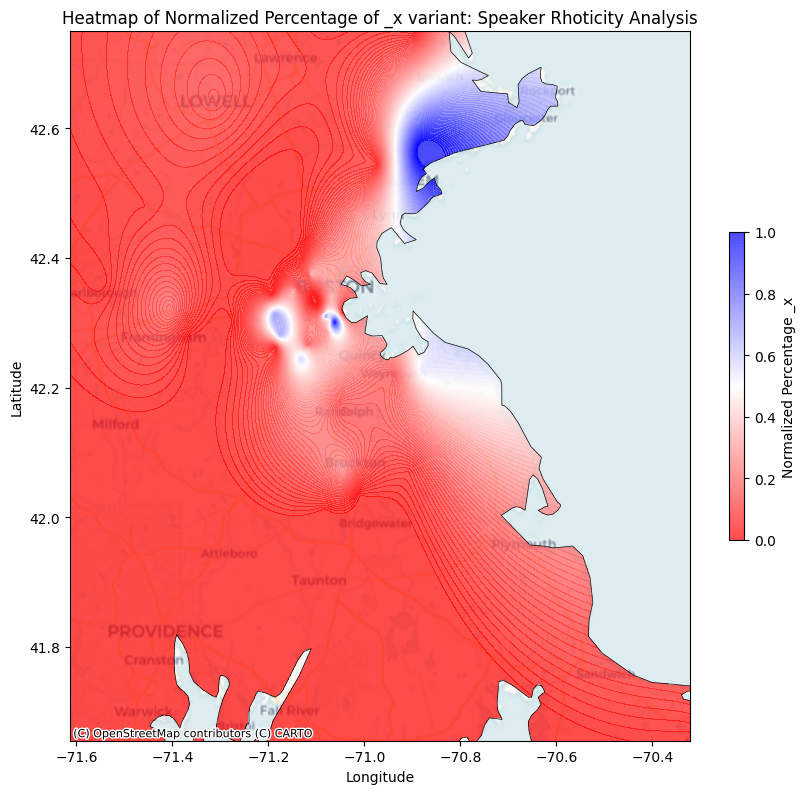

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
from shapely.geometry import Point
import contextily as ctx
from pykrige.ok import OrdinaryKriging

# Load merged speaker rhoticity data
combined_df = pd.read_csv('Speaker_Rhoticity_Summary.csv')
location_df = pd.read_csv('BanBat_pillai.csv')[['speaker', 'Latitude', 'Longitude']]
combined_df = combined_df.merge(location_df, on='speaker', how='inner')

# Correct non-numeric longitude values
combined_df['Longitude'] = pd.to_numeric(combined_df['Longitude'].replace({'?71.049124': -71.049124}), errors='coerce')
combined_df['Latitude'] = pd.to_numeric(combined_df['Latitude'], errors='coerce')

# Drop rows with NaNs after coercion
combined_df.dropna(subset=['Longitude', 'Latitude', 'percentage_x'], inplace=True)

# Normalize percentage_x to 0-1
combined_df['percentage_x_normalized'] = combined_df['percentage_x'] / 41

# Coordinates and values
x = combined_df['Longitude'].values
y = combined_df['Latitude'].values
z = combined_df['percentage_x_normalized'].values

# Define grid
gridx = np.linspace(min(x), max(x), 500)
gridy = np.linspace(min(y), max(y), 500)

# Kriging interpolation function
def ordKriging(x, y, z, gridx, gridy):
    valid_mask = ~np.isnan(z)
    x_clean, y_clean, z_clean = x[valid_mask], y[valid_mask], z[valid_mask]

    if len(z_clean) < 2:
        return np.full((len(gridy), len(gridx)), 0.5)

    OK = OrdinaryKriging(
        x_clean, y_clean, z_clean,
        variogram_model='linear',
        variogram_parameters={'slope': 1.0, 'nugget': 0.001},
        verbose=False, enable_plotting=False
    )

    z_grid, ss = OK.execute('grid', gridx, gridy)
    return np.clip(np.nan_to_num(z_grid, nan=0.5), 0, 1)

# Plot heatmap function
def plotHeatmap(x, y, z, gridx, gridy, title):
    z_grid = ordKriging(x, y, z, gridx, gridy)

    land_mask = gpd.read_file("/content/Clipped_land_ExportFeatures.shp")

    cmap = colors.LinearSegmentedColormap.from_list("custom", ["red", "white", "blue"])

    fig, ax = plt.subplots(figsize=(10, 10))

    xx, yy = np.meshgrid(gridx, gridy)
    points = np.vstack((xx.flatten(), yy.flatten())).T

    land_polygon = land_mask.geometry.unary_union
    mask = np.array([land_polygon.contains(Point(pt)) for pt in points])
    z_masked = np.where(mask.reshape(z_grid.shape), z_grid, np.nan)

    contour = ax.contourf(gridx, gridy, z_masked, levels=100, cmap=cmap, alpha=0.7)

    cbar = plt.colorbar(contour, ax=ax, label='Normalized Percentage _x', shrink=0.4)
    cbar.set_ticks(np.linspace(0, 1, 6))
    cbar.set_ticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])

    land_mask.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

    try:
        ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Voyager, alpha=0.8)
    except Exception as e:
        print(f"Could not add basemap: {e}")
        ax.set_facecolor("white")

    ax.set_title(f'Heatmap of Normalized Percentage of _x variant: {title}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.set_xlim(min(gridx), max(gridx))
    ax.set_ylim(min(gridy), max(gridy))

    plt.show()

# Call plotting function
plotHeatmap(x, y, z, gridx, gridy, 'Speaker Rhoticity Analysis')


<h4><strong> - Speaker pinned maps</strong></h4>

In [ ]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NewQuestions          89 non-null     object 
 1   corpus                89 non-null     object 
 2   speaker               89 non-null     object 
 3   pseudonym             89 non-null     object 
 4   age                   88 non-null     float64
 5   BirthYear             89 non-null     int64  
 6   BirthDecade           89 non-null     int64  
 7   BirthGeneration       89 non-null     object 
 8   gender                89 non-null     object 
 9   race                  89 non-null     object 
 10  ethnicity             89 non-null     object 
 11  HomeTown              81 non-null     object 
 12  NeighborhoodType      86 non-null     object 
 13  county                89 non-null     object 
 14  SouthernParent        87 non-null     object 
 15  SouthernGrandparent   87 

In [ ]:
# Check for non-float values in 'Longitude' column
non_float_values = geo_df[~geo_df['Longitude'].astype(str).str.replace('.', '', 1).str.isdigit()]['Longitude'].unique()
non_float_values


array(['-71.0449946', '-71.0448531', '-71.0620287', '-71.1071909',
       '-71.0811608', '-71.3263253', '-71.087859', '-70.8772451',
       '-71.1867993', '-71.3118269', '-71.1850523', '-71.1320302',
       '-70.9063805', '-71.2791497', '-70.8971046', '-71.0094653',
       '-71.111566', '-70.9748155', '-71.4030911', '-71.1429157',
       '-71.0845953', '-70.9470754', '-71.0442995', '-71.0818113',
       '-71.1253373', '-71.0810667', '-71.4580815', '-70.951191',
       '-71.0184938', '-71.1178911', '-71.6130076', '-71.3614789',
       '-70.8692233', '-71.0845504', '-71.5464306', '-71.1314426',
       '-71.0454645', '-71.0758714', '-70.8811725', '-70.9410356',
       '-71.068731', '-71.0991275', '-71.1559917', '-71.1178267',
       '-71.3352222', '-71.0757371', '-71.4378492', '-71.3490196',
       '-71.2739514', '-71.1125269', '-71.1009029', '-71.1913348',
       '-71.1747435', '-71.1450153', '-71.1033003', '-71.072105',
       '-71.093483', '?71.049124', '-70.3211692', '-71.1455508'],
 

In [ ]:
# Issue fix
geo_df['Longitude'] = geo_df['Longitude'].replace({'?71.049124': -71.049124})

In [ ]:
# Issue fix
# Convert the 'Longitude' column to numeric, coercing errors to NaN
geo_df['Longitude'] = pd.to_numeric(geo_df['Longitude'], errors='coerce')

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(geo_df,
                        lat="Latitude",
                        lon="Longitude",
                        hover_data={"speaker": False, "pseudonym": False},
                        color_discrete_sequence=["#c23b22"],
                        zoom=8,
                        height=700,
                        width=700
                       )

fig.update_traces(marker=dict(size=15, opacity=0.8))

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

<ipython-input-100-993a3b4ee35d>:28: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.



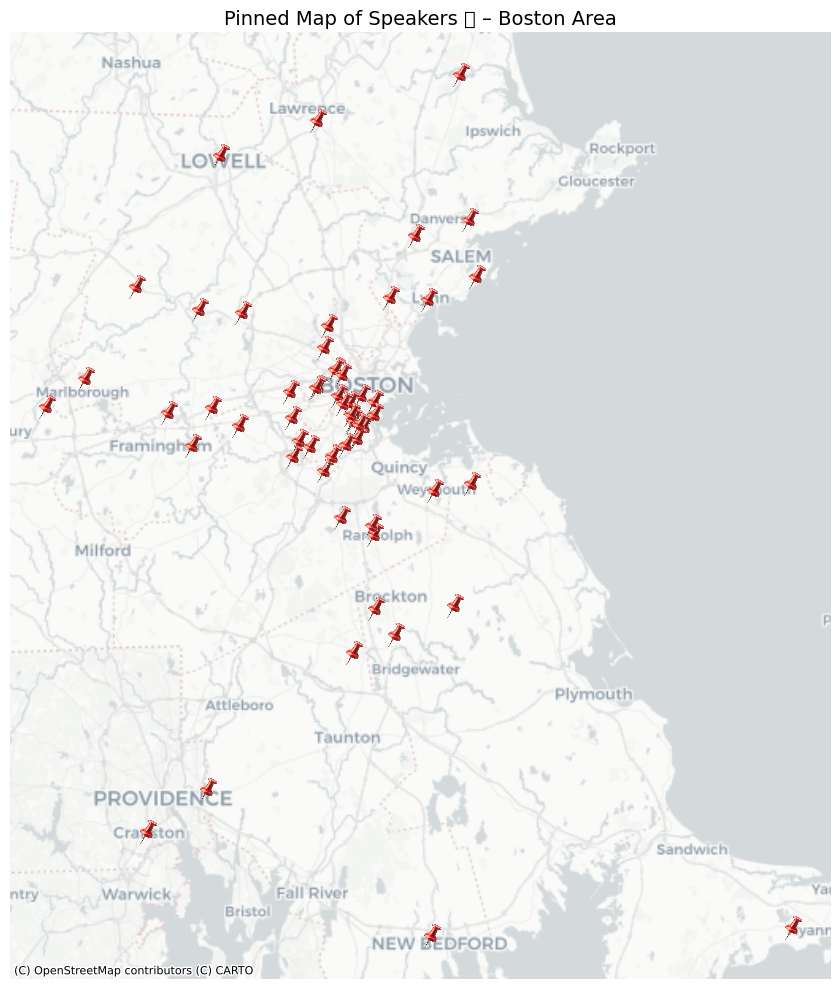

In [ ]:
import geopandas as gpd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load the 📍 pin image
pin_img = mpimg.imread('/content/drive/MyDrive/Fads_spring/images/pin image.webp')

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df['Longitude'], geo_df['Latitude']), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)  # Web Mercator for contextily tiles

# Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# Add base map of Boston
gdf.plot(ax=ax, markersize=0)  # Just to set extent
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Add pin images
for x, y in zip(gdf.geometry.x, gdf.geometry.y):
    ab = AnnotationBbox(OffsetImage(pin_img, zoom=0.05), (x, y), frameon=False)
    ax.add_artist(ab)

# Labels and formatting
ax.set_title("Pinned Map of Speakers 📍 – Boston Area", fontsize=14)
ax.set_axis_off()  # Clean map style

plt.tight_layout()
plt.show()


<h4><strong> - Aggregations</strong></h4>

In [ ]:
combined_df.head()

speaker   Latitude  Longitude  BanBat_pillai  MaryMarryMerry_pillai  \
0  EM-02-35  42.465305 -71.018494       0.745897               0.280271   
1  EM-02-27  42.067522 -71.044299       0.880543               0.334992   
2  EM-03-06  41.654866 -70.321169       0.564361               0.277015   
3  EM-02-79  42.262689 -71.117827       0.697946               0.693426   
4  EM-02-80  42.285849 -71.075737       0.614670               0.514194   

   PinPen_pillai  ThoughtLot_pillai  PricePride_pillai  ColtCult_pillai  \
0       0.137653           0.111587           0.128368              NaN   
1       0.400452           0.164696           0.093452         0.605072   
2       0.355370           0.089514           0.057109              NaN   
3       0.492635           0.107298           0.098337         0.045576   
4       0.016016           0.089485           0.109289         0.393764   

   START_minus_LOT  PALM_minus_LOT     F1_diff      sfvs  
0        64.587500      -57.544444 -168.709509  2.159453  
1       -11.910823     -389.838095 -170.794055  2.155722  
2        31.773798      -22.197313  -93.986735  2.232199  
3        60.264259        1.451024 -118.128356  2.217285  
4       -12.034644     -100.542100 -164.309740  1.910417

In [ ]:
# Convert relevant columns to numeric, coercing errors to NaN
for col in ['PricePride_pillai', 'ColtCult_pillai', 'PinPen_pillai']:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Calculate 1 - value for ColtCult_pillai and PinPen_pillai
aggDf = combined_df.copy()
aggDf['ColtCult_pillai'] = 1 - aggDf['ColtCult_pillai']
aggDf['PinPen_pillai'] = 1 - aggDf['PinPen_pillai']
aggDf['ThoughtLot_pillai'] = 1 - aggDf['ThoughtLot_pillai']

In [ ]:
x = aggDf['Longitude'].values
y = aggDf['Latitude'].values

- <strong>AAL</strong>

In [ ]:
# Calculate AAL_average, skipping rows with NaNs in any of the involved columns
aggDf['AAL_average'] = aggDf[['PricePride_pillai', 'ColtCult_pillai', 'PinPen_pillai']].sum(axis=1, skipna=True) / 3
aggDf.head()

speaker   Latitude  Longitude  BanBat_pillai  MaryMarryMerry_pillai  \
0  EM-02-35  42.465305 -71.018494       0.745897               0.280271   
1  EM-02-27  42.067522 -71.044299       0.880543               0.334992   
2  EM-03-06  41.654866 -70.321169       0.564361               0.277015   
3  EM-02-79  42.262689 -71.117827       0.697946               0.693426   
4  EM-02-80  42.285849 -71.075737       0.614670               0.514194   

   PinPen_pillai  ThoughtLot_pillai  PricePride_pillai  ColtCult_pillai  \
0       0.862347           0.888413           0.128368              NaN   
1       0.599548           0.835304           0.093452         0.394928   
2       0.644630           0.910486           0.057109              NaN   
3       0.507365           0.892702           0.098337         0.954424   
4       0.983984           0.910515           0.109289         0.606236   

   START_minus_LOT  PALM_minus_LOT     F1_diff      sfvs  AAL_average  
0        64.587500      -57.544444 -168.709509  2.159453     0.330238  
1       -11.910823     -389.838095 -170.794055  2.155722     0.362643  
2        31.773798      -22.197313  -93.986735  2.232199     0.233913  
3        60.264259        1.451024 -118.128356  2.217285     0.520042  
4       -12.034644     -100.542100 -164.309740  1.910417     0.566503

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



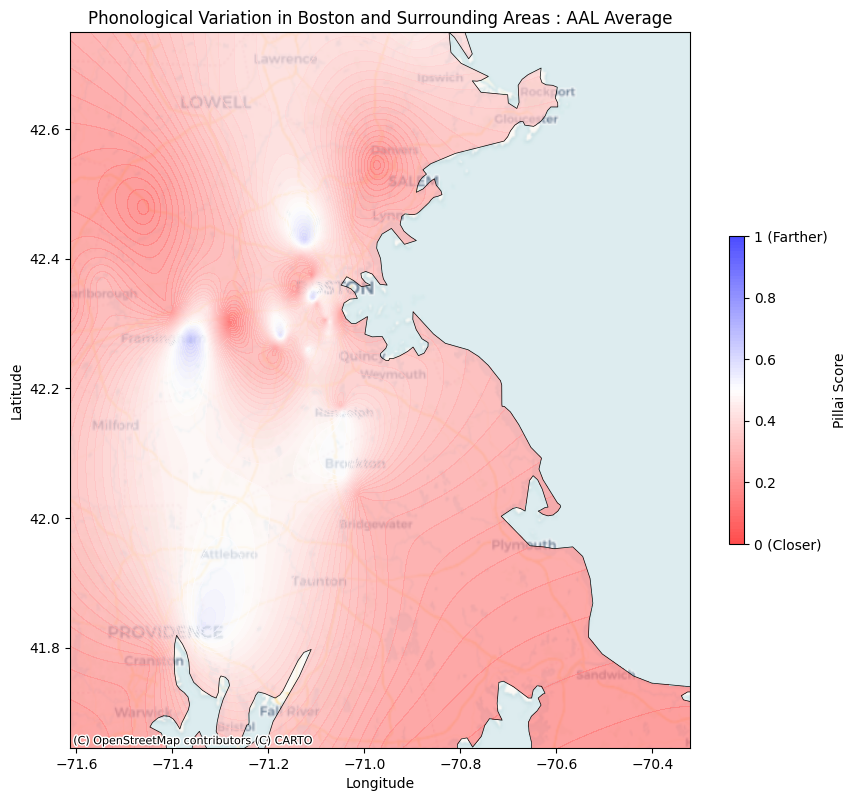

In [ ]:
plotHeatmaps(x, y, aggDf['AAL_average'].values,gridx,gridy,'AAL Average')

In [ ]:
# Normalize sfvs to 0-1 scale
aggDf['sfvs_normalized'] = (aggDf['sfvs'] - aggDf['sfvs'].min()) / (aggDf['sfvs'].max() - aggDf['sfvs'].min())

# Calculate AAL_average_sfvs
aggDf['AAL_average_sfvs'] = (aggDf['PricePride_pillai'] + aggDf['ColtCult_pillai'] + aggDf['PinPen_pillai'] + aggDf['sfvs_normalized']) / 4
aggDf.head()

speaker   Latitude  Longitude  BanBat_pillai  MaryMarryMerry_pillai  \
0  EM-02-35  42.465305 -71.018494       0.745897               0.280271   
1  EM-02-27  42.067522 -71.044299       0.880543               0.334992   
2  EM-03-06  41.654866 -70.321169       0.564361               0.277015   
3  EM-02-79  42.262689 -71.117827       0.697946               0.693426   
4  EM-02-80  42.285849 -71.075737       0.614670               0.514194   

   PinPen_pillai  ThoughtLot_pillai  PricePride_pillai  ColtCult_pillai  \
0       0.862347           0.888413           0.128368              NaN   
1       0.599548           0.835304           0.093452         0.394928   
2       0.644630           0.910486           0.057109              NaN   
3       0.507365           0.892702           0.098337         0.954424   
4       0.983984           0.910515           0.109289         0.606236   

   START_minus_LOT  PALM_minus_LOT     F1_diff      sfvs  AAL_average  \
0        64.587500      -57.544444 -168.709509  2.159453     0.330238   
1       -11.910823     -389.838095 -170.794055  2.155722     0.362643   
2        31.773798      -22.197313  -93.986735  2.232199     0.233913   
3        60.264259        1.451024 -118.128356  2.217285     0.520042   
4       -12.034644     -100.542100 -164.309740  1.910417     0.566503   

   sfvs_normalized  AAL_average_sfvs  
0         0.517336               NaN  
1         0.512869          0.400199  
2         0.604450               NaN  
3         0.586590          0.536679  
4         0.219115          0.479656

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



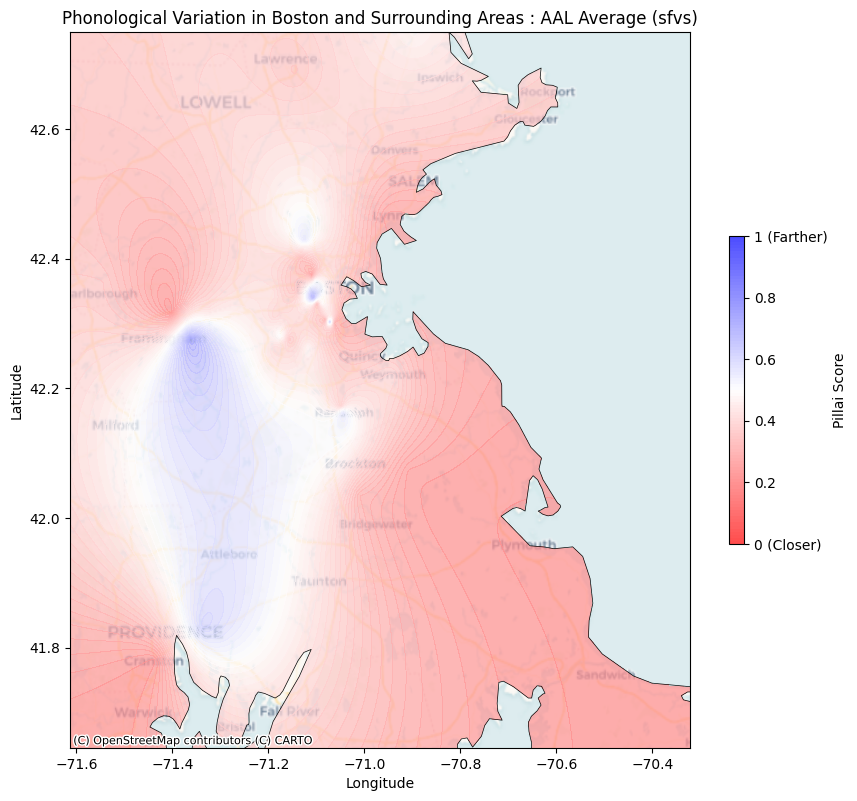

In [ ]:
plotHeatmaps(x, y, aggDf['AAL_average_sfvs'].values,gridx,gridy,'AAL Average (sfvs)')

- <strong>NE</strong>

In [ ]:
# Calculate NE-average
aggDf['NE_average'] = aggDf[['MaryMarryMerry_pillai', 'BanBat_pillai', 'ThoughtLot_pillai']].mean(axis=1)
aggDf.head()

speaker   Latitude  Longitude  BanBat_pillai  MaryMarryMerry_pillai  \
0  EM-02-35  42.465305 -71.018494       0.745897               0.280271   
1  EM-02-27  42.067522 -71.044299       0.880543               0.334992   
2  EM-03-06  41.654866 -70.321169       0.564361               0.277015   
3  EM-02-79  42.262689 -71.117827       0.697946               0.693426   
4  EM-02-80  42.285849 -71.075737       0.614670               0.514194   

   PinPen_pillai  ThoughtLot_pillai  PricePride_pillai  ColtCult_pillai  \
0       0.862347           0.888413           0.128368              NaN   
1       0.599548           0.835304           0.093452         0.394928   
2       0.644630           0.910486           0.057109              NaN   
3       0.507365           0.892702           0.098337         0.954424   
4       0.983984           0.910515           0.109289         0.606236   

   START_minus_LOT  PALM_minus_LOT     F1_diff      sfvs  AAL_average  \
0        64.587500      -57.544444 -168.709509  2.159453     0.330238   
1       -11.910823     -389.838095 -170.794055  2.155722     0.362643   
2        31.773798      -22.197313  -93.986735  2.232199     0.233913   
3        60.264259        1.451024 -118.128356  2.217285     0.520042   
4       -12.034644     -100.542100 -164.309740  1.910417     0.566503   

   sfvs_normalized  AAL_average_sfvs  NE_average  
0         0.517336               NaN    0.638193  
1         0.512869          0.400199    0.683613  
2         0.604450               NaN    0.583954  
3         0.586590          0.536679    0.761358  
4         0.219115          0.479656    0.679793

<ipython-input-82-6a725cb85b11>:30: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



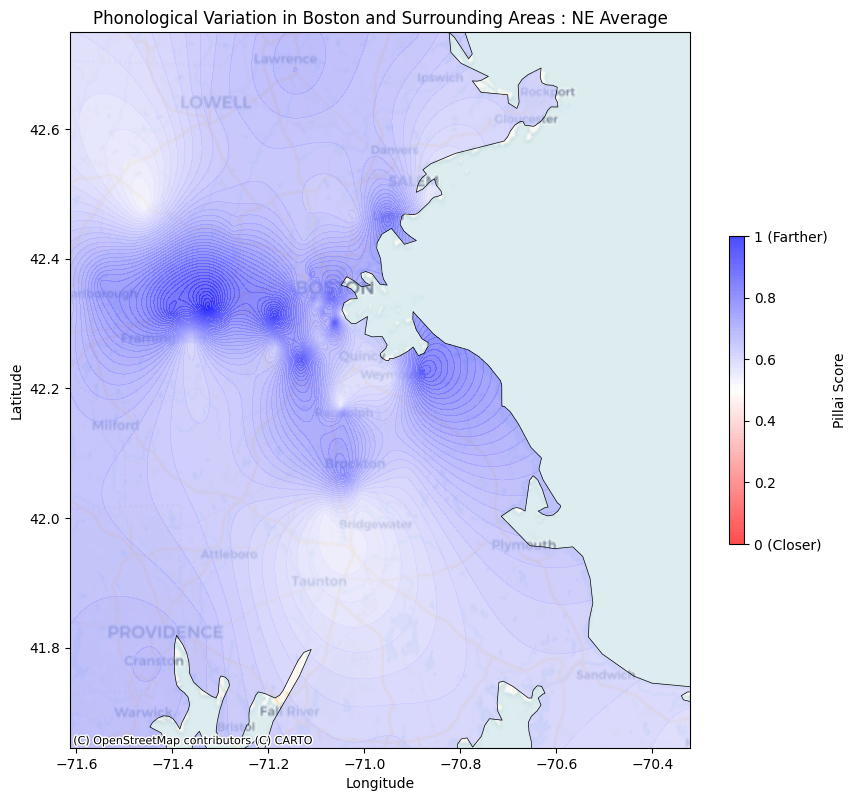

In [ ]:
plotHeatmaps(x, y, aggDf['NE_average'].values,gridx,gridy,'NE Average')